## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

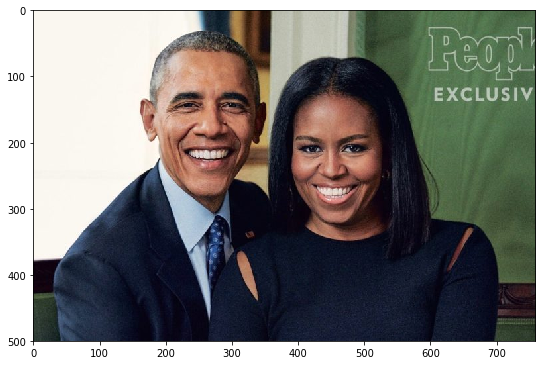

In [48]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

In [49]:
image.shape

(500, 759, 3)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


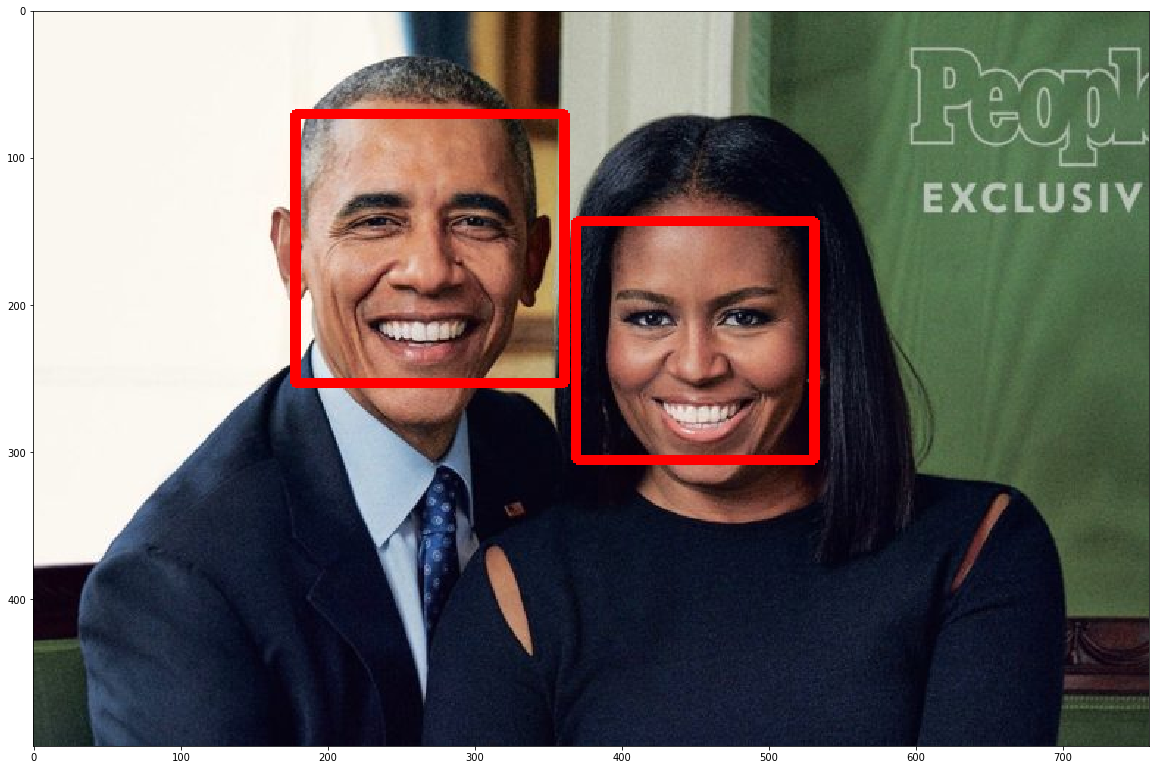

In [50]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.3, 5)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),5) 

fig = plt.figure(figsize=(20,20))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [51]:
import torch
from models import *

# net = VGG_reg()
net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/keypoints_model_net6.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout2d(p=0.1)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Dropout2d(p=0.2)
    (9): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Dropout2d(p=0.3)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (16): ReLU()
    (17): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




(500, 759, 3)
torch.Size([1, 224, 224])
torch.Size([1, 1, 224, 224])
torch.Size([1, 224, 224])
torch.Size([1, 1, 224, 224])


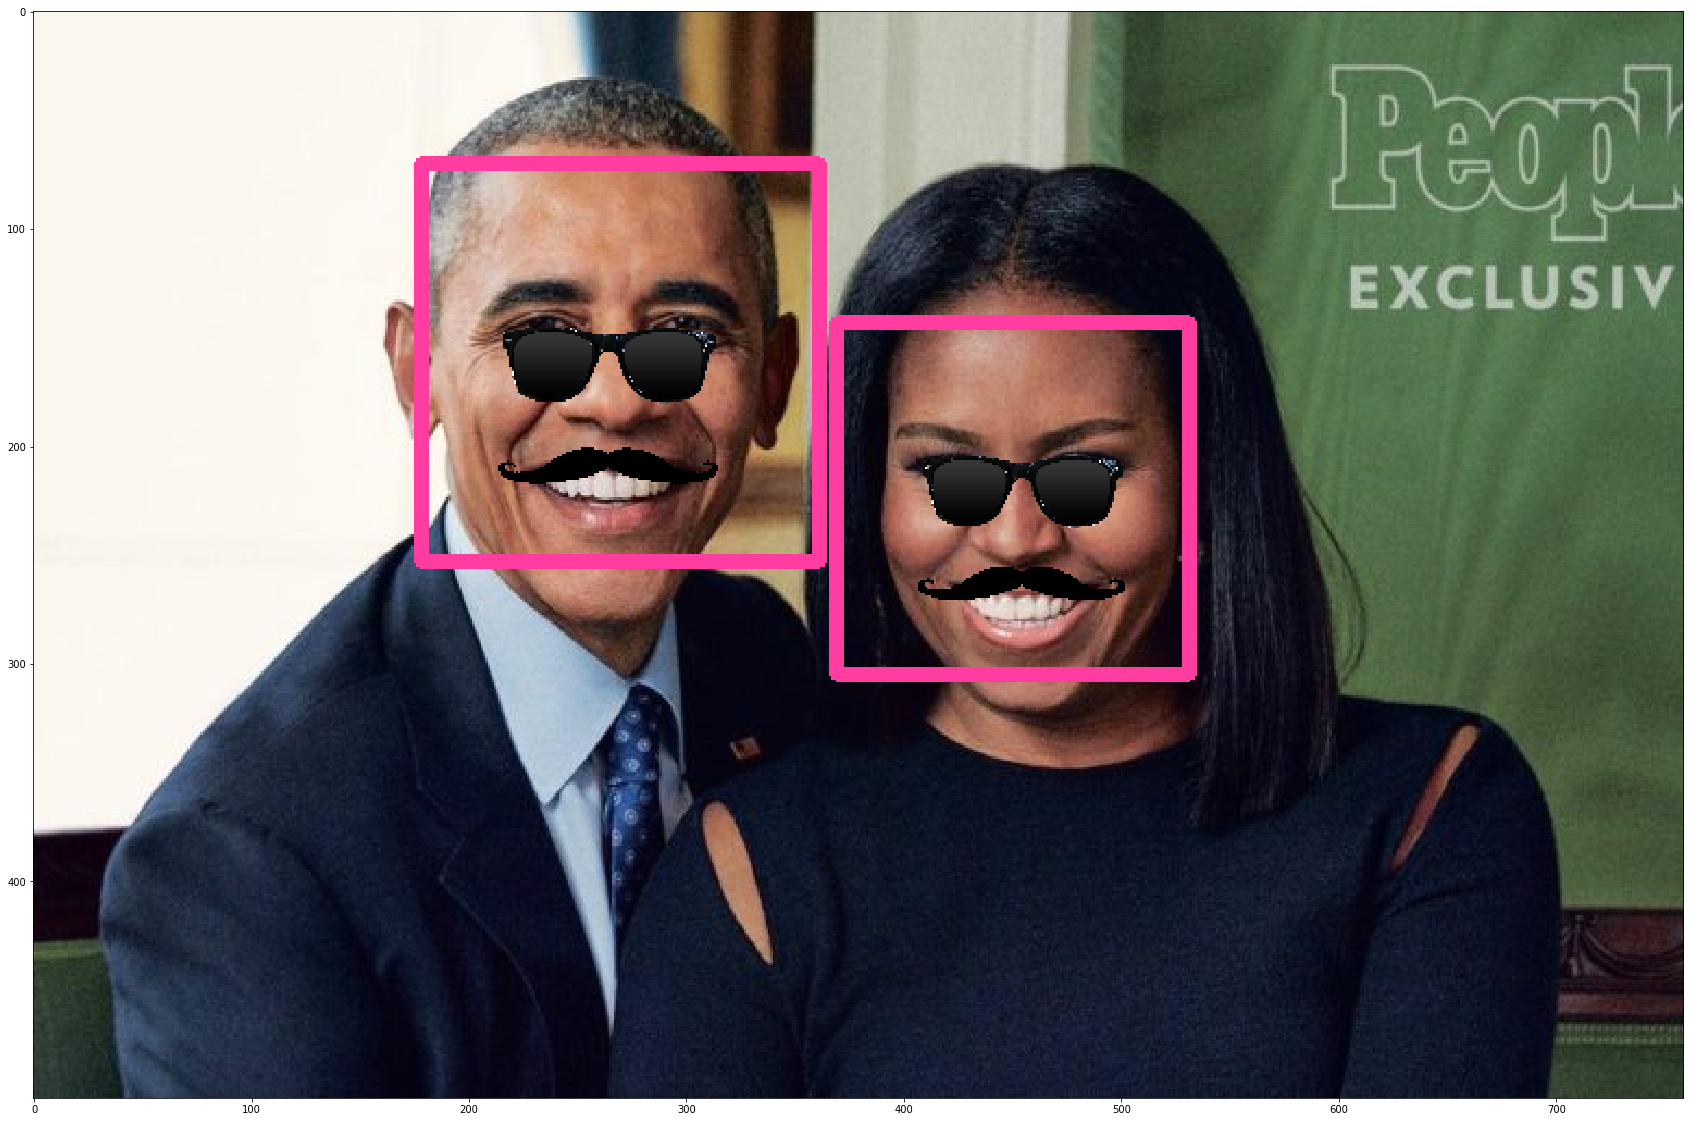

In [53]:
image_copy = np.copy(image)
print(image_copy.shape)
from torch.autograd import Variable

net.to("cuda")
net.eval()

# read in sunglasses
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
moustach = cv2.imread("images/moustache.png", cv2.IMREAD_UNCHANGED)


# loop over the detected faces from your haar cascade
plt.figure(figsize=(30,20))
for (x,y,w,h) in faces:
    #print("h=", h, ";w=", w)
    # Select the region of interest that is the face in the image 
    image_copy_1 = image_copy[y:y+int(h*1.1), x:x+int(w*1.1)]
    
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(image_copy_1, cv2.COLOR_RGB2GRAY)
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi/255.0
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    scale_factor = np.array([[w/224, h/224]])
    roi = cv2.resize(roi, (224, 224))
    khra = np.copy(roi)
    #plt.imshow(roi, cmap='gray')
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = roi.reshape(roi.shape[0], roi.shape[1], 1)

    roi = roi.transpose((2, 0, 1))
    roi = torch.from_numpy(roi)
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
#     roi = Variable(roi)
    
    roi = roi.type(torch.cuda.FloatTensor)
    print(roi.shape)
    roi = roi.unsqueeze(0)
    print(roi.shape)
    out = net(roi)
    out = out.view(68, -1)
    out = out.data.cpu().numpy()
    out = out*50.0 + 100
    #out = out*1.1/224 + np.array([[x, y]])
    for i, (x_land, y_land) in enumerate(out):
        # landmark
        #print(x_land, y_land)
        correc_x = int(x + x_land*w*1.1/224)
        correc_y = int(y + y_land*h*1.1/224)
        
        out[i,:] = np.array([[correc_x, correc_y]]) 
        #print(correc_x, correc_y)
        #cv2.circle(image_copy, (correc_x, correc_y), 2, (255, 0, 0), -1)


    # top-left location for sunglasses to go
    # 17 = edge of left eyebrow
    x1 = int(out[17, 0])
    y1 = int(out[17, 1])
    #cv2.circle(image_copy, (x1, y1), 2, (255, 0, 255), -1)
    # height and width of sunglasses
    # h = length of nose
    h1 = int(abs(out[27,1] - out[34,1]))
#     # w = left to right eyebrow edges
    w1 = int(abs(out[17,0] - out[26,0])) + 4
#     w1 = int(np.sqrt((out[27,0]-out[17,0])**2 + (out[27,1]-out[17,1])**2))
    # resize sunglasses
    new_sunglasses =  cv2.resize(sunglasses, (w1, h1), interpolation = cv2.INTER_CUBIC)

#     # get region of interest on the face to change
    roi_color = image_copy[y1:y1+h1,x1:x1+w1]

    # find all non-transparent pts
    ind = np.argwhere(new_sunglasses[:,:,3] > 0)

    # for each non-transparent point, replace the original image pixel with that of the new_sunglasses
    for i in range(3):
        roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    
    # set the area of the image to the changed region with sunglasses
    image_copy[y1:y1+h1,x1:x1+w1] = roi_color
        # top-left location for sunglasses to go
        
        
        
    # 33 = edge of bottom nose
    x1 = int(out[33, 0])
    y1 = int(out[33, 1])
    #cv2.circle(image_copy, (x1, y1), 2, (255, 0, 255), -1)
    # height and width of sunglasses
    # h = length of nose
    h1 = int(abs(out[32,1] - out[57,1]))
#     # w = left to right eyebrow edges
    w1 = int(abs(out[12,0] - out[4,0])) + 4 
#     print("h=",h1, ";w=",w1)
#     w1 = int(np.sqrt((out[27,0]-out[17,0])**2 + (out[27,1]-out[17,1])**2))
    # resize sunglasses
    new_moustach =  cv2.resize(moustach, (w1-1, h1), interpolation = cv2.INTER_CUBIC)

#     # get region of interest on the face to change
    roi_color = image_copy[y1:y1+h1,x1-w1//2:x1+w1//2]

    # find all non-transparent pts
    ind = np.argwhere(new_moustach[:,:,3] > 0)
#     print("roi_color", roi_color.shape)
#     print("moustach", new_moustach.shape)
#     print("moustach", ind.shape)
    # for each non-transparent point, replace the original image pixel with that of the new_sunglasses
    for i in range(3):
        roi_color[ind[:,0],ind[:,1],i] = new_moustach[ind[:,0],ind[:,1],i]    
    # set the area of the image to the changed region with sunglasses
    image_copy[y1:y1+h1,x1-w1//2:x1+w1//2] = roi_color
#     plt.imshow(khra, cmap="gray")
#     plt.scatter(out[:,0], out[:,1])
#     plt.show()
    ## TODO: Display each detected face and the corresponding keypoints 
    #image_copy[y:y+int(h*1.1), x:x+int(w*1.1)] = cv2.GaussianBlur(image_copy[y:y+int(h*1.1), x:x+int(w*1.1)], (51,51), 0)
    cv2.rectangle(image_copy, (x, y), (x+w, y+h), (255,60,160), 5)


plt.imshow(image_copy)
